In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re

### Windowsでうまくできないため、GitBashで実施
IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
解凍
!tar zxf aclImdb_v1.tar.gz
aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
IMDBデータセットの説明を表示
!cat aclImdb/README

大規模な映画レビューデータセットv1.0

概要

このデータセットには、映画レビューと関連するバイナリが含まれています
センチメント極性ラベル。のベンチマークとして機能することを目的としています
センチメント分類。このドキュメントでは、データセットがどのようになったかを概説します
収集され、提供されたファイルの使用方法。

データセット

コアデータセットには、2万5千のトレインに均等に分割された50,000件のレビューが含まれています
および25kテストセット。ラベルの全体的な分布はバランスが取れています（25k
posおよび25k neg）。また、追加の50,000ラベルなし
教師なし学習用のドキュメント。

コレクション全体では、30件を超えるレビューは許可されません
同じ映画のレビューには相関がある傾向があるため
評価。さらに、トレインとテストセットには、互いに素なセットが含まれています。
映画なので、暗記しても重要なパフォーマンスは得られません
映画固有の用語と、観察されるラベルに関連付けられた用語。の中に
ラベル付きのトレイン/テストセット、ネガティブレビューのスコアは10点中4点以下
肯定的なレビューのスコアは10点中7点以上です。
より中立的な評価は、トレイン/テストセットには含まれません。の中に
教師なしセット、あらゆる評価のレビューが含まれており、
偶数のレビュー> 5および<= 5。

ファイル

に対応する2つの最上位ディレクトリ[train /、test /]があります。
トレーニングおよびテストセット。それぞれには、[pos /、neg /]ディレクトリが含まれます。
バイナリラベルが正と負のレビュー。これらの中で
ディレクトリ、レビューは次の名前のテキストファイルに保存されます
規則[[id] _ [rating] .txt]ここで、[id]は一意のIDであり、[rating]は
そのレビューの星評価を1〜10のスケールで。たとえば、ファイル
[test / pos / 200_8.txt]は、ポジティブラベルのテストセットのテキストです。
IMDbの一意のID 200と星評価8/10の例。の
[train / unsup /]ディレクトリにはすべての評価に対して0があります。評価は
データセットのこの部分では省略されます。

また、レビューごとにIMDb URLを個別に含めます
[urls_ [pos、neg、unsup] .txt]ファイル。一意のID 200のレビューは
このファイルの200行目にURLがあります。常に変化するIMDbにより、
レビューに直接リンクすることはできませんが、映画の
レビューページ。

レビューテキストファイルに加えて、既にトークン化されたバッグが含まれています
私たちの実験で使用された単語（BoW）機能。これら
train / testディレクトリの.featファイルに保存されます。各.feat
ファイルはLIBSVM形式、ラベル付きのASCIIスパースベクトル形式
データ。これらのファイルの機能インデックスは0から始まり、テキスト
機能インデックスに対応するトークンは[imdb.vocab]にあります。だから
.featファイルの0：7の行は、[imdb.vocab]の最初の単語を意味します
（the）はそのレビューに7回登場します。

.featファイル形式の詳細については、LIBSVMページ：
http://www.csie.ntu.edu.tw/~cjlin/libsvm/

また、[imdbEr.txt]には、
（Potts、2011）によって計算された[imdb.vocab]の各トークン。期待される
評価は、単語の平均的な極性を理解するための良い方法です
データセット内。

データセットの引用

このデータセットを使用する場合、ACL 2011の論文を引用してください。
紹介します。このペーパーには、分類結果も含まれています。
あなたは比較したいかもしれません。


@InProceedings {maas-EtAl：2011：ACL-HLT2011、
  著者= {マース、アンドリューL.とデイリー、レイモンドE.とファム、ピーターT.とファン、ダンとNg、アンドリューY.とポッツ、クリストファー}、
  title = {感情分析のための学習単語ベクトル}、
  booktitle = {第49回計算言語学会の年次総会の議事録：Human Language Technologies}、
  月= {6月}、
  年= {2011}、
  住所= {米国オレゴン州ポートランド}、
  出版社= {計算言語学協会}、
  ページ= {142--150}、
  url = {http://www.aclweb.org/anthology/P11-1015}
}

参照資料

ポッツ、クリストファー。 2011.否定の否定性について。ナン・リーと
デイビッド・ルッツ編、意味論と言語理論の議事録20
636-659。

接触

質問/コメント/修正については、アンドリュー・マースまでご連絡ください
amaas@cs.stanford.edu

In [2]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [3]:
print("x_train : {}".format(x_train[2]))
display(len(x_train))
display(y_train.shape)
print("x_test : {}".format(x_test[0]))
display("y_test : {}".format(y_test.shape))

x_train : Everyone plays their part pretty well in this "little nice movie". Belushi gets the chance to live part of his life differently, but ends up realizing that what he had was going to be just as good or maybe even better. The movie shows us that we ought to take advantage of the opportunities we have, not the ones we do not or cannot have. If U can get this movie on video for around $10, it´d be an investment!


25000

(25000,)

x_test : Don't hate Heather Graham because she's beautiful, hate her because she's fun to watch in this movie. Like the hip clothing and funky surroundings, the actors in this flick work well together. Casey Affleck is hysterical and Heather Graham literally lights up the screen. The minor characters - Goran Visnjic {sigh} and Patricia Velazquez are as TALENTED as they are gorgeous. Congratulations Miramax & Director Lisa Krueger!


'y_test : (25000,)'

### 【問題1】BoWのスクラッチ実装 
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。
This movie is SOOOO funny!!!
What a movie! I never
best movie ever!!!!! this movie

In [4]:
from sklearn.datasets import load_files
from collections import Counter
import pandas as pd

In [5]:
data = ["This movie is SOOOO funny!!!", "What a movie! I never", "best movie ever!!!!! this movie" ]

### 1gram

In [6]:
data_word_sentence = []
splited_word = []
for d in data:
    a = d.split()
    data_word_sentence.append(a)
    for i in a:
        splited_word.append(i)

In [7]:
splited_word = list(set(splited_word))

In [8]:
data_word_sentence

[['This', 'movie', 'is', 'SOOOO', 'funny!!!'],
 ['What', 'a', 'movie!', 'I', 'never'],
 ['best', 'movie', 'ever!!!!!', 'this', 'movie']]

In [9]:
splited_word

['This',
 'movie!',
 'never',
 'this',
 'best',
 'What',
 'I',
 'is',
 'SOOOO',
 'movie',
 'funny!!!',
 'ever!!!!!',
 'a']

In [10]:
result_dict1 = {}
for i in splited_word:
    one_list = []
    for j in data_word_sentence:
        one_list.append(j.count(i))
        result_dict1[i] = one_list

In [11]:
result_dict1

{'This': [1, 0, 0],
 'movie!': [0, 1, 0],
 'never': [0, 1, 0],
 'this': [0, 0, 1],
 'best': [0, 0, 1],
 'What': [0, 1, 0],
 'I': [0, 1, 0],
 'is': [1, 0, 0],
 'SOOOO': [1, 0, 0],
 'movie': [1, 0, 2],
 'funny!!!': [1, 0, 0],
 'ever!!!!!': [0, 0, 1],
 'a': [0, 1, 0]}

In [12]:
result_df = pd.DataFrame(result_dict1, index=data)
result_df

,This,movie!,never,this,best,What,I,is,SOOOO,movie,funny!!!,ever!!!!!,a
This movie is SOOOO funny!!!,1,0,0,0,0,0,0,1,1,1,1,0,0
What a movie! I never,0,1,1,0,0,1,1,0,0,0,0,0,1
best movie ever!!!!! this movie,0,0,0,1,1,0,0,0,0,2,0,1,0


### 2glam

In [13]:
split_word_2gram = []
word_sentence_2gram = []
for l in data_word_sentence:
    wow = []
    for idx in range(len(l) -2 +1):
        ab = l[idx:idx + 2]
        d = ab[0] +" " + ab[1]
        split_word_2gram.append(d)
        wow.append(d)
    
    word_sentence_2gram.append(wow)

In [14]:
word_sentence_2gram

[['This movie', 'movie is', 'is SOOOO', 'SOOOO funny!!!'],
 ['What a', 'a movie!', 'movie! I', 'I never'],
 ['best movie', 'movie ever!!!!!', 'ever!!!!! this', 'this movie']]

In [15]:
split_word_2gram

['This movie',
 'movie is',
 'is SOOOO',
 'SOOOO funny!!!',
 'What a',
 'a movie!',
 'movie! I',
 'I never',
 'best movie',
 'movie ever!!!!!',
 'ever!!!!! this',
 'this movie']

In [16]:
result_dict2 = {}
for i in split_word_2gram:
    one_list2 = []
    for j in word_sentence_2gram:
        one_list2.append(j.count(i))
        result_dict2[i] = one_list2

In [17]:
result_dict2

{'This movie': [1, 0, 0],
 'movie is': [1, 0, 0],
 'is SOOOO': [1, 0, 0],
 'SOOOO funny!!!': [1, 0, 0],
 'What a': [0, 1, 0],
 'a movie!': [0, 1, 0],
 'movie! I': [0, 1, 0],
 'I never': [0, 1, 0],
 'best movie': [0, 0, 1],
 'movie ever!!!!!': [0, 0, 1],
 'ever!!!!! this': [0, 0, 1],
 'this movie': [0, 0, 1]}

In [18]:
result_df2 = pd.DataFrame(result_dict2, index=data)
result_df2

,This movie,movie is,is SOOOO,SOOOO funny!!!,What a,a movie!,movie! I,I never,best movie,movie ever!!!!!,ever!!!!! this,this movie
This movie is SOOOO funny!!!,1,1,1,1,0,0,0,0,0,0,0,0
What a movie! I never,0,0,0,0,1,1,1,1,0,0,0,0
best movie ever!!!!! this movie,0,0,0,0,0,0,0,0,1,1,1,1


### 【問題2】TF-IDFの計算 
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。
TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。
sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.21.3 documentation

sklearn.feature_extraction.text.TfidfTransformer — scikit-learn 0.21.3 documentation
なお、scikit-learnでは標準的な式とは異なる式が採用されています。

In [19]:
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'ther

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 5000)

x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.fit_transform(x_test)

print(x_train_tfidf.shape)
print(x_test_tfidf.shape)

(25000, 5000)
(25000, 5000)


In [21]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 5000, ngram_range=(2,2))

x_train_tfidf_2gram = vectorizer.fit_transform(x_train)
x_test_tfidf_2gram = vectorizer.fit_transform(x_test)

print(x_train_tfidf_2gram.shape)
print(x_test_tfidf_2gram.shape)

(25000, 5000)
(25000, 5000)


In [22]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 1000, ngram_range=(2,2))

x_train_tfidf_1000 = vectorizer.fit_transform(x_train)
x_test_tfidf_1000 = vectorizer.fit_transform(x_test)

print(x_train_tfidf_1000.shape)
print(x_test_tfidf_1000.shape)

(25000, 1000)
(25000, 1000)


### 【問題3】TF-IDFを用いた学習 
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。
モデルは2値分類が行える任意のものを利用してください。
ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [23]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lgrg = LogisticRegression()

In [24]:
lgrg.fit(x_train_tfidf, y_train)

y_pred = lgrg.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred))

0.55672


In [25]:
lgrg.fit(x_train_tfidf_2gram, y_train)

y_pred = lgrg.predict(x_test_tfidf_2gram)
print(accuracy_score(y_test, y_pred))

0.56448


In [26]:
lgrg.fit(x_train_tfidf_1000, y_train)

y_pred = lgrg.predict(x_test_tfidf_1000)
print(accuracy_score(y_test, y_pred))

0.56576


### 【問題4】TF-IDFのスクラッチ実装 
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

In [27]:
# normal
tfidf_array = np.zeros((3, 13))
for j in range(3):
    for i in range(13):
        n = result_df.iat[j, i]
        s = result_df.sum(axis=1)[j]
        N = result_df.shape[0]
        d = (result_df.iloc[:,i] >= 1).sum()
        
        tf = n / s
        idf = np.log(N / d)
        
        tf_idf = tf * idf
        tfidf_array[j ,i] = tf_idf

In [28]:
tfidf_array

array([[0.21972246, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21972246, 0.21972246, 0.08109302,
        0.21972246, 0.        , 0.        ],
       [0.        , 0.21972246, 0.21972246, 0.        , 0.        ,
        0.21972246, 0.21972246, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21972246],
       [0.        , 0.        , 0.        , 0.21972246, 0.21972246,
        0.        , 0.        , 0.        , 0.        , 0.16218604,
        0.        , 0.21972246, 0.        ]])

In [29]:
#sklearn
tfidf_sk_arr = np.zeros((3, 13))
for j in range(3):
    for i in range(13):
        n = result_df.iat[j, i]
        s = result_df.sum(axis=1)[j]
        N = result_df.shape[0]
        d = (result_df.iloc[:,i] >= 1).sum()
        
        tf = n 
        idf = np.log((1 + N) / (1 +  d)) + 1
        
        tf_idf = tf * idf
        tfidf_sk_arr[j ,i] = tf_idf

In [30]:
tfidf_sk_arr

array([[1.69314718, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.69314718, 1.69314718, 1.28768207,
        1.69314718, 0.        , 0.        ],
       [0.        , 1.69314718, 1.69314718, 0.        , 0.        ,
        1.69314718, 1.69314718, 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.69314718],
       [0.        , 0.        , 0.        , 1.69314718, 1.69314718,
        0.        , 0.        , 0.        , 0.        , 2.57536414,
        0.        , 1.69314718, 0.        ]])

In [31]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習

print("語彙の一覧 : {}".format(model.wv.vocab.keys()))

for vocab in model.wv.vocab.keys():
    print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[ 1.1524981e-02  2.7084388e-02  2.2070020e-02  1.6686095e-02
 -3.4407750e-02 -2.8236525e-05  2.3415362e-02  3.3600561e-02
 -1.2054920e-02 -1.3261908e-02]
movieのベクトル : 
[-0.04015991  0.02022825  0.0182989   0.01375688  0.00740749 -0.00526672
  0.0361031   0.02409956 -0.03207843 -0.00312093]
isのベクトル : 
[ 0.03917522  0.04211482  0.03767929 -0.04038543  0.00196545 -0.03449796
  0.04687466  0.04485184 -0.04104432 -0.00049705]
veryのベクトル : 
[ 0.02125311 -0.00029463  0.03866521 -0.02928989  0.04804871  0.00747588
  0.02256865 -0.00252252 -0.03878171 -0.02170852]
goodのベクトル : 
[ 0.00412245 -0.00546295  0.04336939  0.0437059  -0.00028617 -0.03659139
 -0.00952999  0.0104233   0.0143617   0.0369311 ]
filmのベクトル : 
[-0.01609745  0.02100273  0.01885548  0.00570064 -0.02331446 -0.0322019
  0.02078786  0.02106917 -0.03751916 -0.04049024]
aのベクトル : 
[ 0.01570226  0.02379345 -0.04512323  0.03353819 -0.04723103  0.01

C:\Users\anai\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


C:\Users\anai\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


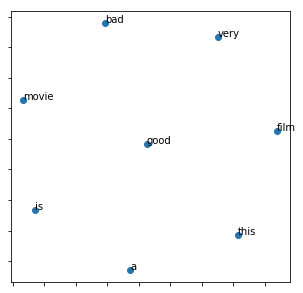

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = model.wv.vocab.keys()

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

### 【問題5】コーパスの前処理 
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [33]:
import re

In [34]:
coupus = []
for i in range(len(x_train)):
    x_train[i] = x_train[i].lower()
    x_train[i] = x_train[i].replace("!", "").strip()
    x_train[i] = x_train[i].replace("?", "").strip()
    x_train[i] = x_train[i].replace("<br />", "").strip()
    x_train[i] = re.sub(r"https?://[\w/:%#\$&\?\(\)~\.=\+\-]+", "", x_train[i])
    x_train[i] = x_train[i].split()

### Word2Vecの学習
Word2Vecの学習を行なってください。

In [35]:
from gensim.models import Word2Vec
sentences = x_train
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習

C:\Users\anai\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


(22227201, 28707255)

### 【問題7】ベクトルの可視化
得られたベクトルをt-SNEにより可視化してください。また、いくつかの単語を選びwv.most_similarを用いて似ている単語を調べてください。

In [36]:
model.wv.most_similar(positive="good", topn=3)

[('terrible', 0.9659481048583984),
 ('horrible', 0.955410361289978),
 ('rarely-before-seen', 0.9495246410369873)]

In [37]:
model.wv.most_similar(positive="like", topn=3)

[('beckinsale´s', 0.9744152426719666),
 ('seriously,which', 0.9675507545471191),
 ('cupertino)', 0.9437820911407471)]

In [38]:
model.wv.most_similar(positive="by", topn=3)

[('infidelity.set', 0.9432936906814575),
 ('rnb', 0.9428316950798035),
 ('unrevealing.4/10', 0.9389966130256653)]